Observations:

For the temperature v hemisphere graphs, both regression lines indicate that the further away from the equator you go, the colder it is going to be.
Cloudiness and wind speed have no correlation to latitude. The variance does appear to increase as you move away from the equator.
Similarly, the humidity appears to be highest near the equator, and becomes more varied as we go away from it.


In [32]:
import requests
import random
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stat
import datetime
from config import api_key
from citipy import citipy


In [33]:
def RegressMe(x, y):
    slope, intr, r, p, stderr = stat.linregress(x,y)
    newY = slope * x + intr
    return newY

In [34]:
today = date.today()
strDate = today.strftime("%m/%d/%y")

In [35]:
#get cities
#lat -90->90
#lon -180->180
foundCities = 0
cityNames = []
cityData = []
while foundCities < 500:
    findLat = random.uniform(-90.00, 90.00)
    findLon = random.uniform(-180.00, 180.00)
    #temp humidity, cloudiness, windspeed
    cityName = citipy.nearest_city(findLat, findLon).city_name
    if cityName not in cityNames:
        url = "http://api.openweathermap.org/data/2.5/weather?q=" + cityName + "&appid=" + api_key + "&units=imperial"
        cityJson = requests.get(url).json()
        try:
            cityInfo = {'City': cityName,
                        'Temperature (F)': cityJson['main']['temp'],
                        'Humidity %': cityJson['main']['humidity'],
                        'Cloudiness %': cityJson['clouds']['all'],
                        'Wind Speed (mph)': cityJson['wind']['speed'],
                        'Latitude': cityJson['coord']['lat'],
                        'Longitude': cityJson['coord']['lon'],
                        'Country': cityJson['sys']['country'],
                        'Date': cityJson['dt']}
            
            cityInfo['Date'] = datetime.datetime.fromtimestamp(int(cityInfo['Date'])).strftime('%m/%d/%y')
            
            
            cityNames.append(cityName)
            cityData.append(cityInfo)
            
            print(f'{cityName} added as #{foundCities+1}')
            foundCities = foundCities +1
        except:
            print(f'{cityName} not found...')
            

lod added as #1
bengkulu added as #2
albany added as #3
belushya guba not found...
mataura added as #4
belushya guba not found...
castro added as #5
merritt island added as #6
lagoa added as #7
kodiak added as #8
nizhneyansk not found...
porto novo added as #9
kapaa added as #10
punta arenas added as #11
olafsvik added as #12
ushuaia added as #13
khatanga added as #14
grootfontein added as #15
busselton added as #16
puerto ayora added as #17
coquimbo added as #18
hasaki added as #19
hervey bay added as #20
hami added as #21
hobart added as #22
mecca added as #23
tuktoyaktuk added as #24
atuona added as #25
praya added as #26
kayes added as #27
saint pete beach added as #28
jamestown added as #29
nikolskoye added as #30
tulua added as #31
longyearbyen added as #32
hare bay added as #33
semnan added as #34
phan thiet added as #35
harwich added as #36
sentyabrskiy not found...
antofagasta added as #37
geraldton added as #38
lasa added as #39
kampot added as #40
hermanus added as #41
pevek

aswan added as #307
acapulco added as #308
belushya guba not found...
genhe added as #309
druzhba added as #310
asau added as #311
hamilton added as #312
elmadag added as #313
camabatela added as #314
pacific grove added as #315
kaitangata added as #316
saint anthony added as #317
mazagao added as #318
methoni added as #319
sola added as #320
korla added as #321
vanimo added as #322
khandyga added as #323
nanyamba added as #324
pemberton added as #325
kalabo added as #326
tateyama added as #327
kudahuvadhoo added as #328
dzhusaly not found...
clyde river added as #329
illoqqortoormiut not found...
ossora added as #330
sunrise manor added as #331
manastirea casin not found...
aklavik added as #332
nizhniy kuranakh added as #333
moron added as #334
vanderhoof added as #335
attawapiskat not found...
kuche not found...
muros added as #336
grand river south east not found...
hargeysa added as #337
madimba added as #338
arua added as #339
thunder bay added as #340
axim added as #341
canaries

In [36]:
dfCities = pd.DataFrame(cityData)

dfCities.head()

,City,Temperature (F),Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude,Country,Date
0,lod,56.26,82,40,5.82,31.95,34.90,IL,04/10/20
1,bengkulu,77.50,81,87,4.09,-3.80,102.27,ID,04/10/20
2,albany,42.49,49,75,24.16,42.60,-73.97,US,04/10/20
3,mataura,39.99,95,6,1.99,-46.19,168.86,NZ,04/10/20
4,castro,71.74,34,37,4.25,-24.79,-50.01,BR,04/10/20


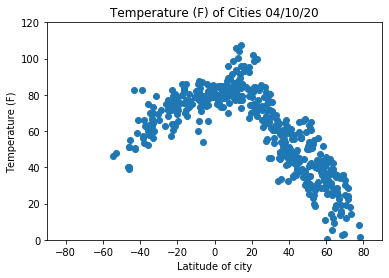

In [37]:
plt.scatter(dfCities['Latitude'], dfCities['Temperature (F)'])
plt.xlim(-90, 90)
plt.ylim(0,120)

plt.title('Temperature (F) of Cities '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Temperature (F)')
plt.savefig('Images/TempVLat')
plt.show()

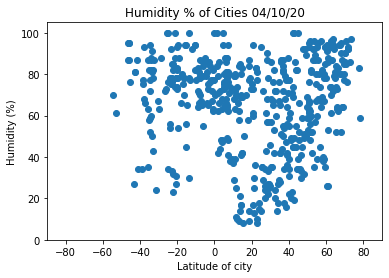

In [38]:
plt.scatter(dfCities['Latitude'], dfCities['Humidity %'])
plt.xlim(-90, 90)
plt.ylim(0,105)

plt.title('Humidity % of Cities ' + strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Humidity (%)')
plt.savefig('Images/HumidityVLat')
plt.show()


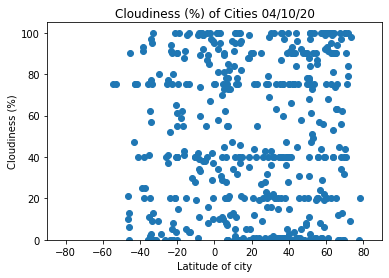

In [39]:
plt.scatter(dfCities['Latitude'], dfCities['Cloudiness %'])
plt.xlim(-90, 90)
plt.ylim(0,105)

plt.title('Cloudiness (%) of Cities '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Cloudiness (%)')
plt.savefig('Images/CloudVLat')
plt.show()


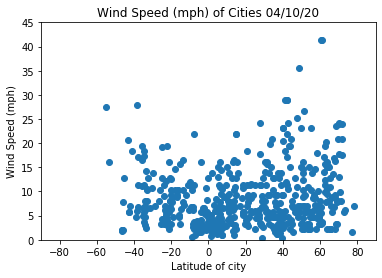

In [40]:
plt.scatter(dfCities['Latitude'], dfCities['Wind Speed (mph)'])
plt.xlim(-90, 90)
plt.ylim(0,45)

plt.title('Wind Speed (mph) of Cities '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Images/WindVLat')
plt.show()


In [41]:
north = dfCities.loc[dfCities['Latitude'] > 0]
south = dfCities.loc[dfCities['Latitude'] < 0]
northLat = north['Latitude']
southLat = south['Latitude']

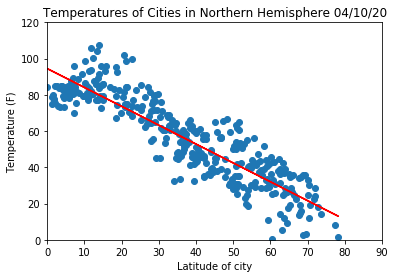

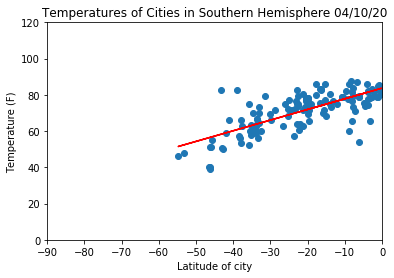

In [42]:
plt.scatter(northLat, north['Temperature (F)'])

y = RegressMe(northLat, north['Temperature (F)'])
plt.plot(northLat, y, color = 'red')

plt.xlim(0, 90)
plt.ylim(0,120)
plt.title('Temperatures of Cities in Northern Hemisphere '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Temperature (F)')
plt.savefig('Images/TempVLatNorthRegress')
plt.show()


#--------------------------------------------------------------
plt.scatter(southLat, south['Temperature (F)'])

y = RegressMe(southLat, south['Temperature (F)'])
plt.plot(southLat, y, color = 'red')

plt.xlim(-90, 0)
plt.ylim(0,120)
plt.title('Temperatures of Cities in Southern Hemisphere '+ strDate)
plt.xlabel('Latitude of city')
plt.ylabel('Temperature (F)')
plt.savefig('Images/TempVLatSouthRegress')
plt.show()

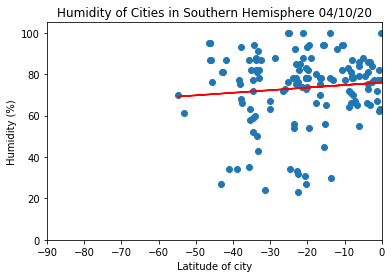

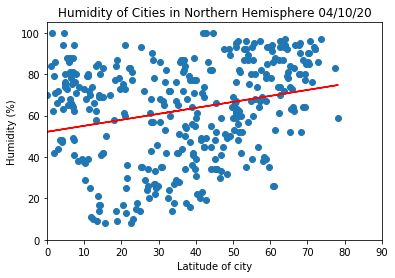

In [43]:
plt.scatter(southLat, south['Humidity %'])

y = RegressMe(southLat, south['Humidity %'])

plt.plot(southLat, y, color = 'red')

plt.title('Humidity of Cities in Southern Hemisphere '+ strDate)
plt.xlim(-90, 0)
plt.ylim(0,105)
plt.xlabel('Latitude of city')
plt.ylabel('Humidity (%)')
plt.savefig('Images/HumidityVLatSouthRegress')
plt.show()



#---------------------------------------------------
plt.scatter(northLat, north['Humidity %'])

y = RegressMe(northLat, north['Humidity %'])

plt.plot(northLat, y, color = 'red')

plt.title('Humidity of Cities in Northern Hemisphere '+ strDate)
plt.xlim(0, 90)
plt.ylim(0,105)
plt.xlabel('Latitude of city')
plt.ylabel('Humidity (%)')
plt.savefig('Images/HumidityVLatNorthRegress')
plt.show()

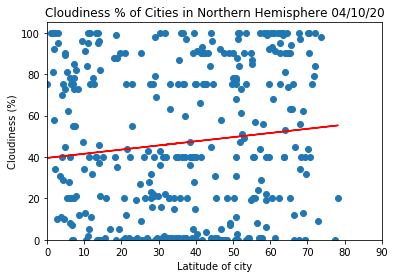

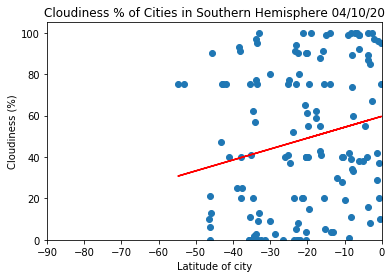

In [44]:
plt.scatter(northLat, north['Cloudiness %'])

y = RegressMe(northLat, north['Cloudiness %'])

plt.plot(northLat, y, color = 'red')

plt.title('Cloudiness % of Cities in Northern Hemisphere '+ strDate)
plt.xlim(0, 90)
plt.ylim(0,105)
plt.xlabel('Latitude of city')
plt.ylabel('Cloudiness (%)')
plt.savefig('Images/CloudVLatNorthRegress')
plt.show()

#--------------------------------------------------------

plt.scatter(southLat, south['Cloudiness %'])

y = RegressMe(southLat, south['Cloudiness %'])

plt.plot(southLat, y, color = 'red')

plt.title('Cloudiness % of Cities in Southern Hemisphere '+ strDate)
plt.xlim(-90, 0)
plt.ylim(0,105)
plt.xlabel('Latitude of city')
plt.ylabel('Cloudiness (%)')
plt.savefig('Images/CloudVLatSouthRegress')
plt.show()

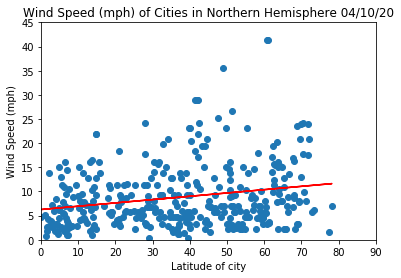

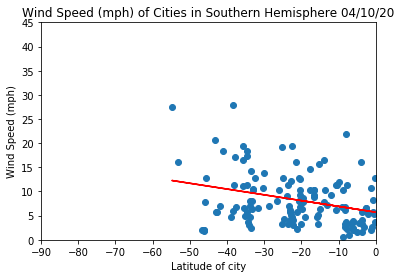

In [45]:
plt.scatter(northLat, north['Wind Speed (mph)'])

y = RegressMe(northLat, north['Wind Speed (mph)'])
plt.plot(northLat, y, color = 'red')

plt.title('Wind Speed (mph) of Cities in Northern Hemisphere '+ strDate)
plt.xlim(-0, 90)
plt.ylim(0,45)
plt.xlabel('Latitude of city')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Images/WindVLatNorthRegress')
plt.show()

#--------------------------------------------------------------

plt.scatter(southLat, south['Wind Speed (mph)'])

y = RegressMe(southLat, south['Wind Speed (mph)'])
plt.plot(southLat, y, color = 'red')

plt.title('Wind Speed (mph) of Cities in Southern Hemisphere '+ strDate)
plt.xlim(-90, 0)
plt.ylim(0,45)
plt.xlabel('Latitude of city')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Images/WindVLatSouthRegress')
plt.show()

In [46]:
dfCities.to_csv('cities.csv', index=False)